In [1]:
#meta 7/25/2022 HackTime2022 Time Series - simulate dataset

#Started from a nb in myStatsR
# refer to https://github.com/anyaconda/myStatsR/blob/master/L22_TimeSeries.ipynb
#Source: the Great Courses Statistics: Concepts and Applications in R 
#Professor: Talithia Williams


#history
# 7/25/2022 SIMULATE TS DATASET
#      three timeseries, one anomolaus


In [11]:
import numpy as np
np.set_printoptions(precision=4)
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

print(pd.__version__, np.__version__)

1.0.3 1.21.0


# HackTime 2022
Simulate a TS dataset: 3 timeseries, 1 is anomalous.  This ds will be used for demo purposes in HackTime2022 activity.

##### Time Series Analysis
1. Describe: identify patterns, trends, and seasonal variation  
2. Explain: understand and model the data  
3. Forecast: predict short-term trends from previous patterns

The goal is to develop a stat model that describes and explains the data in such a way that forecasting can occur. 
 

## 0. Create Data
manually

In [8]:
np.random.seed(37)

#$dates - create a date range for df indexing by date
# refer to https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
start_date = datetime.strptime('01/01/2022', '%m/%d/%Y')
end_date = datetime.strptime('07/10/2022', '%m/%d/%Y')
x_dates = pd.date_range(start=start_date, end=end_date, freq = 'D')

#preview
n_samples = len(x_dates)
n_samples, x_dates[:5]

(191,
 DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
                '2022-01-05'],
               dtype='datetime64[ns]', freq='D'))

In [9]:
#create 3 numpy arrays - code  could be optimized, ok for a quick ds
y = np.linspace(50,50, num =n_samples)
w = np.random.normal(1, 0.1, size=n_samples)
for t in range(n_samples):
    y[t] = y[t-1] + w[t]
    
y2 = np.linspace(50,50, num =n_samples)
w2 = np.random.normal(2, 0.125, size=n_samples)
for t in range(n_samples):
    y2[t] = y2[t-1] + w2[t]
    
    y3 = np.linspace(50,50, num =n_samples)
w3 = np.random.normal(5, 0.15, size=n_samples)
for t in range(n_samples):
    y3[t] = y3[t-1] + w3[t]

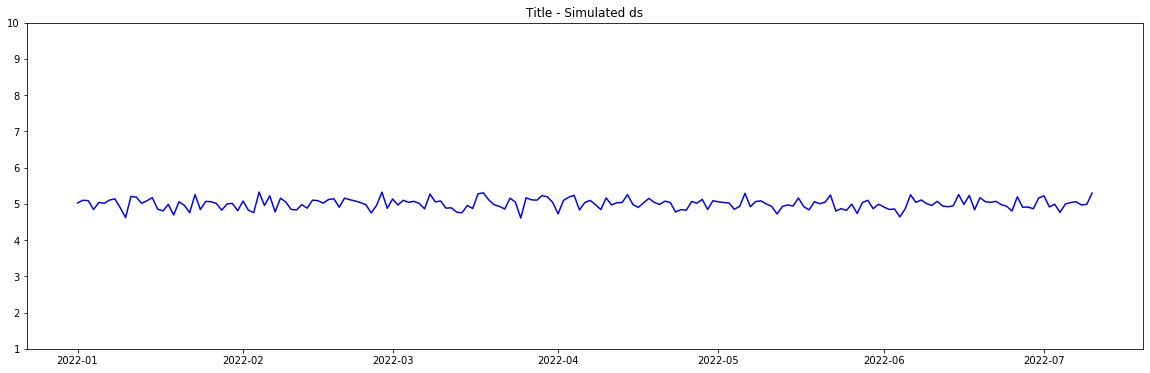

In [13]:
#vis TS plot
plt.figure(figsize=(20, 6))
plt.plot(x_dates, w3, c='b')
plt.title('Title - Simulated ds')
plt.ylim(1,10)
#plt.grid(True)
plt.show()

In [14]:
#form a df
df_tidy = pd.DataFrame({'series 1':w, 'series 2':w2, 'series 3': w3}, index=x_dates)
df_tidy.head()

,series 1,series 2,series 3
2022-01-01,0.994554,1.967861,5.022663
2022-01-02,1.067431,2.037875,5.098748
2022-01-03,1.034665,1.951943,5.088623
2022-01-04,0.869965,1.861584,4.844452
2022-01-05,1.151851,2.227391,5.040427


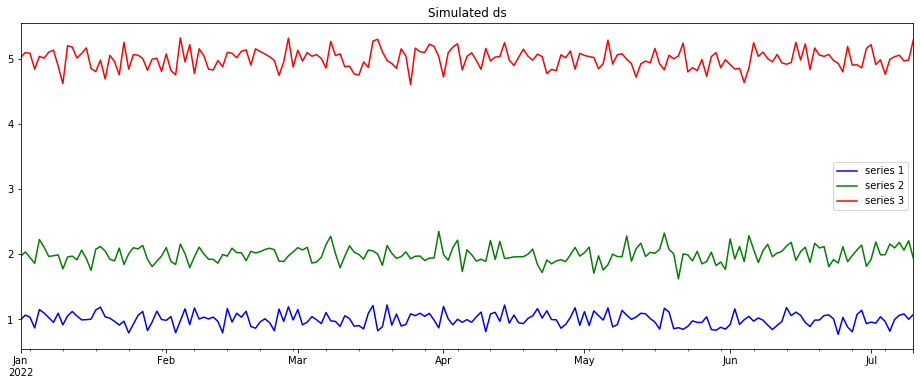

In [16]:
plt.figsize=(16,6)
df_tidy.plot.line(color=['b','g','r'], title = 'Simulated ds', figsize = (16,6));

In [17]:
df_tidy.loc['2022-06-25']['series 3'] = 5.20
df_tidy.loc['2022-06-26']['series 3'] = 5.30
df_tidy.loc['2022-06-27']['series 3'] = 5.50
df_tidy.loc['2022-06-28']['series 3'] = 5.75
df_tidy.loc['2022-06-29']['series 3'] = 6
df_tidy.loc['2022-06-30']['series 3'] = 6.20
df_tidy.loc['2022-07-01']['series 3'] = 6.5
df_tidy.loc['2022-07-02']['series 3'] = 7
df_tidy.loc['2022-07-03']['series 3'] = 7.5
df_tidy.loc['2022-07-04']['series 3'] = 8.75
df_tidy.loc['2022-07-05']['series 3'] = 10
df_tidy.loc['2022-07-06']['series 3'] = np.NaN
df_tidy.loc['2022-07-07']['series 3'] = np.NaN
df_tidy.loc['2022-07-08']['series 3'] = np.NaN
df_tidy.loc['2022-07-09']['series 3'] = np.NaN
df_tidy.loc['2022-07-10']['series 3'] = np.NaN

df_tidy.loc['2022-07-07']['series 3']

nan

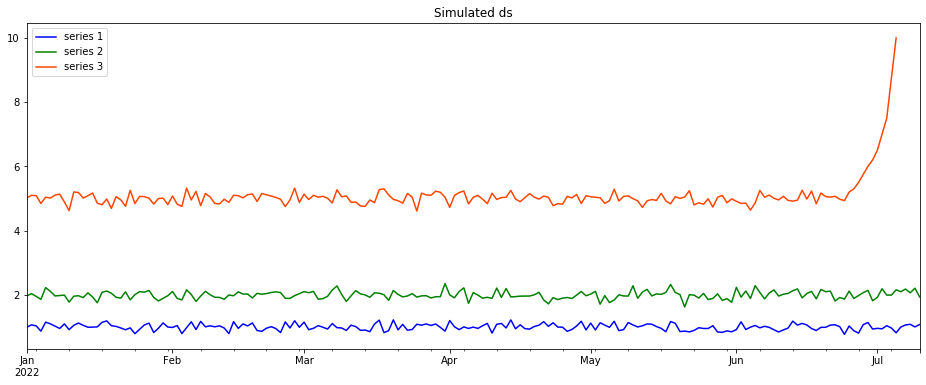

In [18]:
df_tidy.plot.line(color=['b','g','orangered'], title = 'Simulated ds', figsize=(16,6));


## myXtra